In [1]:
#import pandas to handle our data
import pandas as pd

In [3]:
#import data and view all columns
data = pd.read_csv(r'C:/Users/HP/Downloads/bank-additional.csv', delimiter = ';')
pd.set_option("display.max_columns", None)

In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [7]:
#Check for missing values
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
#### Convert our target from yes and no to 0 and 1
data1 = pd.get_dummies(data['y'])

In [10]:
data2 = pd.concat((data1, data), axis=1)

In [12]:
data2 = data2.drop(['no'], axis=1)

In [16]:
data2 = data2.drop(['y'], axis=1)

In [19]:
data3 = data2.rename(columns={"yes":"y"})

In [21]:
###Import label encoder
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder = LabelEncoder()

In [23]:
##Check data types to see what needs encoding
data3.dtypes

y                   uint8
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [29]:

#Encode the categorical variables
data3['job'] = label_encoder.fit_transform(data3['job'])
data3['marital'] = label_encoder.fit_transform(data3['marital'])
data3['education'] = label_encoder.fit_transform(data3['education'])
data3['default'] = label_encoder.fit_transform(data3['default'])
data3['housing'] = label_encoder.fit_transform(data3['housing'])
data3['loan'] = label_encoder.fit_transform(data3['loan'])
data3['contact'] = label_encoder.fit_transform(data3['contact'])
data3['month'] = label_encoder.fit_transform(data3['month'])
data3['day_of_week'] = label_encoder.fit_transform(data3['day_of_week'])
data3['poutcome'] = label_encoder.fit_transform(data3['poutcome'])



In [34]:
#Select only categorical variables
data4 = data3[['y','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]

In [37]:
#Split target and independent variables 
X = data4.drop(['y'], axis=1)
Y = data4['y']

In [38]:
#import chi^2
from sklearn.feature_selection import chi2

In [39]:
#Perform chi^2 on the categorical variables (filter method)
chi_scores = chi2(X,Y)

In [40]:
#Chi scores and p-values
chi_scores

(array([1.00002637e+01, 2.47147732e+00, 2.28092503e+01, 1.95190032e+01,
        3.37326897e-03, 1.05018391e+00, 5.00669927e+01, 1.29857083e-01,
        1.60440575e-01, 9.42922453e+00]),
 array([1.56517810e-03, 1.15928917e-01, 1.78902545e-06, 9.96038637e-06,
        9.53685025e-01, 3.05464733e-01, 1.48585473e-12, 7.18580266e-01,
        6.88751214e-01, 2.13554574e-03]))

In [41]:
#select p_values
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

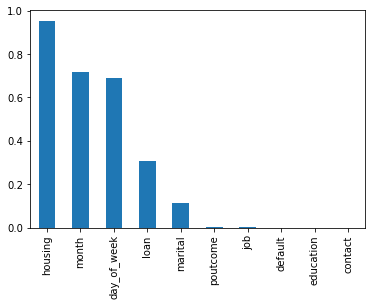

In [42]:
#Plot 
p_values.plot.bar()

In [ ]:
#Drop those with high p value

In [ ]:
##PERFORM CORRELATION analysis on numerical data 
data3.corr()

In [53]:
##Drop those with lowest correlation
data3 = data3.drop(['age','campaign','cons.price.idx','cons.conf.idx'], axis=1)

In [56]:
data3

,y,job,marital,education,default,loan,contact,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed
0,0,1,1,2,0,0,0,487,999,0,1,-1.8,1.313,5099.1
1,0,7,2,3,0,0,1,346,999,0,1,1.1,4.855,5191.0
2,0,7,1,3,0,0,1,227,999,0,1,1.4,4.962,5228.1
3,0,7,1,2,0,1,1,17,999,0,1,1.4,4.959,5228.1
4,0,0,1,6,0,0,0,58,999,0,1,-0.1,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,0,0,1,1,0,2,0,53,999,0,1,1.4,4.958,5228.1
4115,0,0,1,3,0,0,1,219,999,0,1,1.4,4.959,5228.1
4116,0,8,2,3,0,0,0,64,999,1,0,-1.8,1.354,5099.1
4117,0,0,1,3,0,0,0,528,999,0,1,1.4,4.966,5228.1


In [57]:

from sklearn.model_selection import train_test_split

In [59]:
#SPLIT data into X and Y
X = data3.drop(['y'], axis=1)
Y = data3['y']

In [60]:
##SPLIT DATA INTO TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state=0)

In [65]:
from sklearn import tree

In [83]:
##BUILD MODEL

model = tree.DecisionTreeClassifier(splitter = 'best', max_depth = 34, max_leaf_nodes = 11, min_samples_split=14)

In [84]:
##TRAIN MODEL
#model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=34, max_leaf_nodes=11, min_samples_split=14)

In [85]:
#PREDICT USING MODEL
prediction = model.predict(X_test)

In [86]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [87]:
#SCORE
model.score(X_test, y_test)

0.8907766990291263

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
#CONFUSION MATRIX
confusion_matrix(y_test, prediction)

array([[354,  21],
       [ 24,  13]], dtype=int64)

In [77]:
#GENETIC ALGORITHM

from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous

In [78]:
#DEFINE OUR HYPERPARMETERS TO TUNE

param_grid = {'splitter': Categorical(['best','random']),
             'max_depth': Integer(2,50),
             'max_leaf_nodes': Integer(2,75),
             'min_samples_split': Integer(1,15)}

In [80]:
#BUILD GENETIC ALGIRITHM HYPERPARAMETER TUNING MODEL

evolved_estimator = GASearchCV(estimator=model,
                             scoring='accuracy',
                             param_grid=param_grid,
                             n_jobs=-1,
                             verbose=True)

In [81]:
#TRAIN
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	10    	nan    	nan        	nan        	nan        
1  	19    	nan    	nan        	nan        	nan        
2  	18    	nan    	nan        	nan        	nan        
3  	19    	nan    	nan        	nan        	nan        
4  	16    	nan    	nan        	nan        	nan        
5  	20    	nan    	nan        	nan        	nan        
6  	20    	0.907933	0.000242325	0.908014   	0.907206   
7  	19    	0.908014	0          	0.908014   	0.908014   
8  	19    	0.908014	0          	0.908014   	0.908014   
9  	17    	0.908014	0          	0.908014   	0.908014   
10 	19    	0.908014	0          	0.908014   	0.908014   
11 	15    	0.908014	0          	0.908014   	0.908014   
12 	18    	0.908014	0          	0.908014   	0.908014   
13 	16    	0.908014	0          	0.908014   	0.908014   
14 	18    	0.908014	0          	0.908014   	0.908014   
15 	19    	0.908014	0          	0.908014   	0.908014   
16 	19    	0.908014	0          	0.908014   	0.908014   

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\HP\anaconda3\lib\site-packages\sklearn_genetic\utils\cv_scores.py:43: RuntimeWarning: Mean of empty slice
  np.nanmean(cv_scores)


GASearchCV(estimator=DecisionTreeClassifier(max_depth=34, max_leaf_nodes=11,
                                            min_samples_split=14),
           n_jobs=-1,
           param_grid={'max_depth': <sklearn_genetic.space.space.Integer object at 0x000002332CED41C0>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x000002332CED4460>,
                       'min_samples_split': <sklearn_genetic.space.space.Integer object at 0x000002332CED4280>,
                       'splitter': <sklearn_genetic.space.space.Categorical object at 0x000002332CED4160>},
           return_train_score=True, scoring='accuracy')

In [82]:
#RETURN PARATEMETERS
evolved_estimator.best_params_

{'splitter': 'best',
 'max_depth': 34,
 'max_leaf_nodes': 11,
 'min_samples_split': 14}